# Repérage de présence dans les zones en pavé
En reprenant l'idée de Qifei et Fabien de repérer les points dans des zones privilégiées, j'avais pour idée de l'améliorer en remplaçant la délimitation d'un pavé par 4 droites par une sphère définie avec une norme bien choisie

1er exemple, on définit ainsi un pavé:

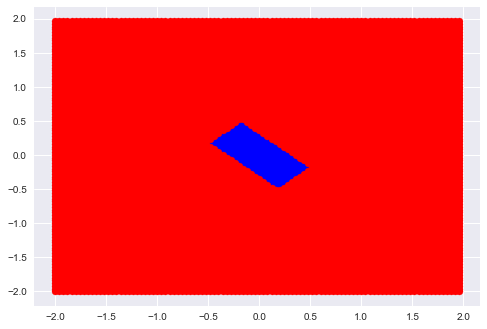

In [63]:
import numpy as np
import matplotlib.pyplot as plt

#a et b sont les paramètres de notre pavé
a=0.5
b=1

#définition nouvelle norme
def norme(X):
    D=np.array([[1/a,0],[0,1/b]])
    return 2*np.max(D.dot(abs(X)))

#on stocke dans Lx et Ly les coordonnées des points du pavé et dans Lx2 et Ly2 pour ceux en dehors

N=100
Lx=[]
Lx2=[]
Ly=[]
Ly2=[]
for i in range(N):
    for j in range(N):
        X=np.array([[i*4/N-2],[j*4/N-2]])
        
        #rotation
        angle = np.pi/4
        R=np.array([[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]])
        
        if norme(R.dot(X))<1:
            Lx.append(X[0])
            Ly.append(X[1])
        else:
            Lx2.append(X[0])
            Ly2.append(X[1])

plt.scatter(Lx,Ly,c='b')
plt.scatter(Lx2,Ly2,c='r')
plt.show()

#On a bien un pavé de centre (0,0), de longueur b et de largeur a

On va poursuivre cette idée en l'appliquant à notre jeu de données, en ayant préalablement défini une zone rectangulaire dans laquelle on veut pouvoir si les points y sont ou non.

A noter que cette méthode ne permet pour l'instant que de délimiter des pavés sans inclinaison. On pourra calculer une matrice de rotation afin de faire tourner le pavé plus loin.

In [64]:
# Quelques imports 
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import numpy as np
import seaborn as sns

# Ici je trouve le dossier dans lequel est rangée la carte
os.chdir('C:/Users/theot/Desktop/srcipt_pe/')

In [65]:
#Lecture du fichier
file = "Historique des positions.json"
df = pd.read_json(file)


donnee=df.get("locations")

In [66]:
donnee.head()

0    {'timestampMs': '1518619077147', 'latitudeE7':...
1    {'timestampMs': '1518618652295', 'latitudeE7':...
2    {'timestampMs': '1518618612191', 'latitudeE7':...
3    {'timestampMs': '1518618552093', 'latitudeE7':...
4    {'timestampMs': '1518618469284', 'latitudeE7':...
Name: locations, dtype: object

In [67]:
#On s'apprête à récupérer les données de latitude, longitude et temps dans des listes
lat=[]
long=[]
temps=[]

#Je filtre le temps sur mes données (je ne veux garder que les données récoltées après le dimanche 11 dévrier 19h)
l='Sun Feb  12 19:00:00 2018'
t=time.strptime(l)
t=time.mktime(t)

for i in range(len(donnee)):
    if t<int(donnee[i]["timestampMs"])/1000:
        lat.append(donnee[i]["latitudeE7"]/1e7)
        long.append(donnee[i]["longitudeE7"]/1e7)
        temps.append(donnee[i]["timestampMs"])
        
len(lat)==len(long)

True

In [76]:
Lx=[]
Lx2=[]
Ly=[]
Ly2=[]

# on définit notre sphère autour du M16
O = np.array([[4.7701,0.0041+45.78]]).transpose()+np.array([[0],[0.00005]])
b=0.0012
a=0.0004

#Là on va distinguer les points qui sont dans la sphère ou non
for i in range(len(lat)):
    X=np.array([[long[i],lat[i]]]).transpose()
    
    #rotation
    angle = np.pi/4
    R=np.array([[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]])
    
    print(norme(R.dot(X-O)))
    
    if norme(R.dot(X-O))<1:
        Lx.append(long[i])
        Ly.append(lat[i])
    else:
        Lx2.append(long[i])
        Ly2.append(lat[i])
#print(Lx)

2.65306464304
3.22122494171
3.22122494171
3.22122494171
3.22122494171
2.28289424307
2.28289424307
2.28289424307
2.16410030384
0.76296821692
0.76296821692
1.11475384055
1.11475384055
1.11475384055
1.11475384055
2.31047140753
2.31047140753
2.31047140753
2.31047140753
1.36577674787
1.36577674787
1.36577674787
1.36577674787
0.427446049245
0.427446049245
0.427446049245
0.425678282287
0.425678282287
0.425678282287
0.425678282287
0.425678282287
0.432395796709
0.432395796709
0.432395796709
0.432395796709
0.446891485716
1.02459772596
3.91772512119
5.11108566554
7.4758864441
5.2502678503
3.85019642357
12.8672220973
13.8299479798
15.9120238971
12.7827228369
33.9180266754
41.0758329192
7.38396256257
0.522905464706
0.411889700045
0.411889700045
0.411889700045
0.50275292143
0.502517219164
0.575584919895
0.513713076544
0.381248406198
0.459383705513
0.435931330602
0.435931330602
0.435931330602
0.473407990026
0.473407990026
0.487903679027
0.482600378188
0.424617622122
0.424617622122
0.502517219167
0.50

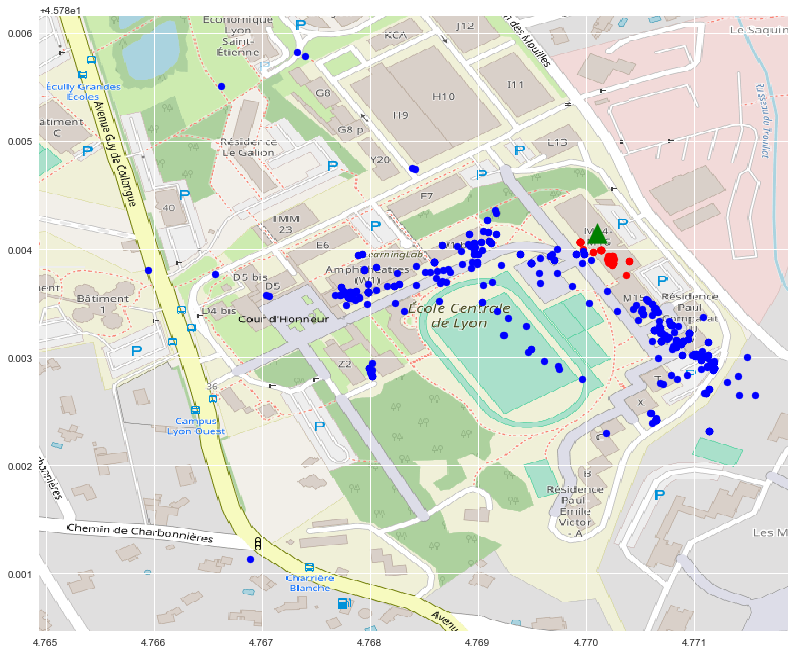

In [77]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(13.42, 12))
axes.scatter(Lx,Ly,c='r')
axes.scatter(Lx2,Ly2,c='b')
axes.scatter(O[0],O[1],c='g',marker ='^', s=400)

datafile = 'carte_centrale_petite.png'
img = plt.imread(datafile)

axes.imshow(img, zorder=0, extent=[4.764941,4.771872,45.780469,45.786155])
plt.show()